# Binary classification
log-loss used for learning

model estimation done by log-loss, confusion matrix and accuracy, precision, recall, F1 score metrics

In [1]:
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10,8]

## Get data

In [3]:
# Generate nonlinear data with outliers.
# Don't hesitate to change the generation parameters, method and data itself! Observe, how it changes results
from sklearn.datasets import make_classification
n_samples = 1000
n_outliers = 100

X, y= make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state =42)

In [4]:
print(X.shape, y.shape)

(1000, 2) (1000,)


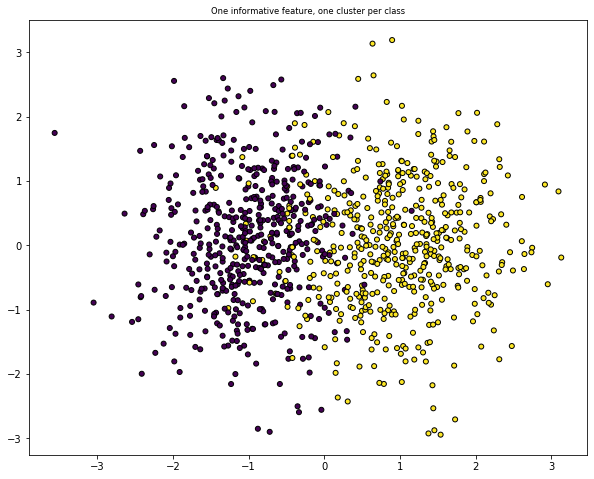

In [5]:
plt.title("One informative feature, one cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


In [6]:
# Replace first N samples with outliers

X[:n_outliers] =8 * np.random.random_sample((100, 2)) - 4
y[:n_outliers] = np.random.randint(2,size=n_outliers)

In [7]:
print(y[:n_outliers])

[0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1]


In [8]:
print(X.shape, y.shape)

(1000, 2) (1000,)


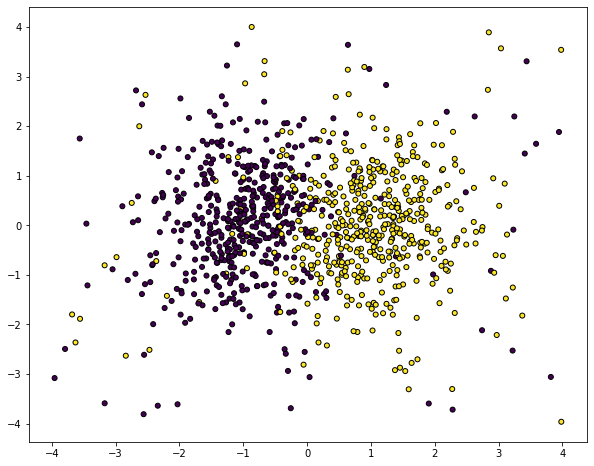

In [9]:
#visualize data
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [10]:
# # Add bias column to data
# X_I = np.c_[np.ones_like(X[:,0]), X]

In [11]:
# print(X_I)

In [12]:
from sklearn.model_selection import train_test_split

# Split data to test and train in sklearn style
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
print(X_train.shape)

(670, 2)


# Loss function 

In [14]:
from sklearn.metrics import log_loss
#log_loss(y_true, y_pred)

### Define predict model
Prediction function $h(\theta|X) = \theta^Tx$:

In [15]:
def predict(X, theta):
    return np.dot(X, theta)

In [16]:
def sigmoid_wrap(predict_func):
    return 1/(1+np.exp(-predict_func))

In [17]:
def objective_function(X, y, theta):
    return log_loss(y, sigmoid_wrap(predict(X, theta)))/ (2*len(X))

In [18]:
def gradientDescent(X, y, init = 1, alpha = 0.001, iters = 100):
    #     theta = np.array([1,1]) * init # init theta with any scalar or vector
    theta = np.ones_like(X[0]) * init 
    m = len(X)
    history = [] 
    cost = [] 
    
    for i in range(iters):
        history.append(theta)
        cost.append(objective_function(X, y, theta))
        
        theta = theta + alpha * (np.sum((y - sigmoid_wrap(np.dot(X, theta.T))) * X.T, axis = 1))
        
    return theta, np.array(cost), np.array(history)

In [19]:
random_model_loss=log_loss(y, predict(X, theta = np.random.random(len(X[0]))))

In [20]:
print('Error of random model:', random_model_loss)

Error of random model: 6.184264399733065


Initialize learning

In [21]:
alpha = 0.00001
iters = 100000

## Learn model on train set

In [22]:
w, cost, history = gradientDescent(X_train, y_train,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization

## Evaluate model cost on test set

In [23]:
y_pred_test= sigmoid_wrap(predict(X_test,w)).round()
# log_loss(y_test, y_pred_test)

In [24]:
objective_function(X_test, y_test, theta= w)

0.0006495985746845105

In [25]:
print('Model`s cost:', objective_function(X_test, y_test, theta= w))
print('Calculated weights: ', w)

Model`s cost: 0.0006495985746845105
Calculated weights:  [ 1.55471556 -0.1439175 ]


## For visualization we will predict on all on the entire feature space 

In [26]:
y_pred= sigmoid_wrap(predict(X,w)).round()

In [27]:
print('Model`s cost:', objective_function(X, y, theta= w))
print('Calculated weights: ', w)

Model`s cost: 0.00021177645650526696
Calculated weights:  [ 1.55471556 -0.1439175 ]


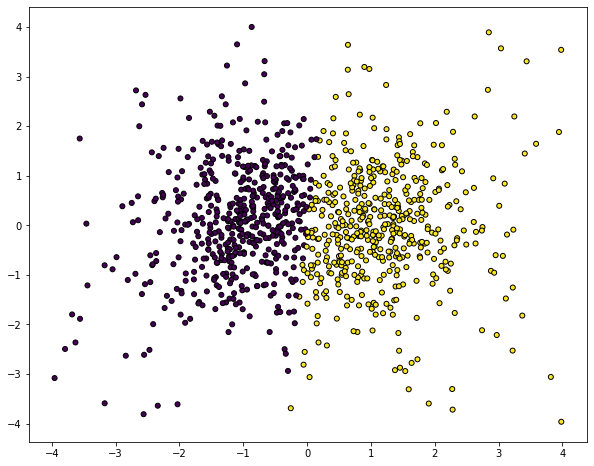

In [28]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y_pred,
            s=25, edgecolor='k')

## Evaluate model by confusion matrix on test set

In [29]:
print(y_pred_test.shape)

(330,)


In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[146  16]
 [ 25 143]]


In [31]:
import pandas as pd
pd.DataFrame([['Predicted:',cm[0][0],cm[1][0]],
                    ['',cm[0][1],cm[1][1]]],
             columns=['Logistic Regression','Actual:', ''], ).T

,0,1
Logistic Regression,Predicted:,
Actual:,146,16
,25,143


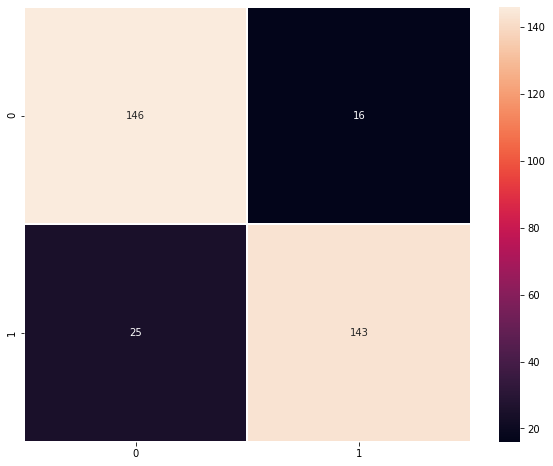

In [32]:
import seaborn as sns
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

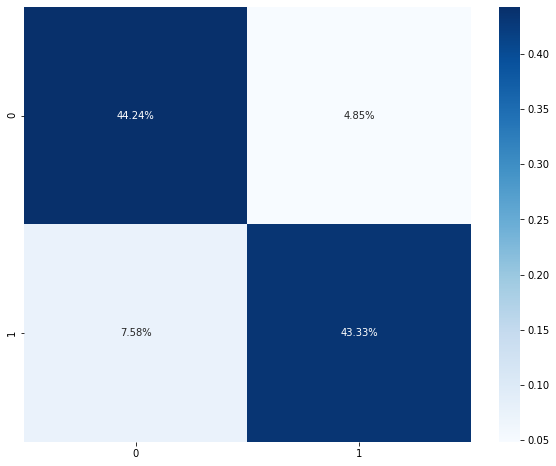

In [33]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

## Evaluate model by Accuracy, Precision, Recall, F1 Score metrics on test set

In [34]:
from sklearn import metrics

In [35]:
def get_metrics(true_labels, predicted_labels):
    return np.round(metrics.accuracy_score(true_labels,predicted_labels),4), np.round(metrics.precision_score(true_labels,predicted_labels,average='weighted'),4), np.round(metrics.recall_score(true_labels,predicted_labels,average='weighted'),4),np.round(metrics.f1_score(true_labels,predicted_labels,average='weighted'),4)

In [36]:
rate = get_metrics(true_labels=y_test, predicted_labels=y_pred_test)

In [37]:
print(rate)
pd.DataFrame([['Custom Logistic Regression', rate[0], rate[1],
               rate[2], rate[3]]],
             columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],).T

(0.8758, 0.877, 0.8758, 0.8757)


,0
Model,Custom Logistic Regression
Accuracy,0.8758
Precision,0.877
Recall,0.8758
F1 Score,0.8757


# Cross validation 

In [38]:
def custom_classification(X, y, 
                      objective_function=objective_function, 
                      loss_function=log_loss, 
                      init = 1, 
                      alpha = 0.001, 
                      iters = 100):
  
    theta_init = np.ones_like(X[0]) * init
    theta, cost_history, theta_history = gradientDescent(X, y, init = init, alpha = alpha, iters = iters)
    
    return theta

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin 

class CustomClassifion(BaseEstimator, ClassifierMixin):                           
    def __init__(self, loss_function=log_loss, objective_function=objective_function,alpha = 0.001, iters = 100 ): # all arguments should have default values
        self.theta = None # we don't know shape of theta on this stage
    # just save all variables taken during call to internal variables
        self.loss_function = loss_function 
        self.objective_function = objective_function
        self.alpha = alpha
        self.iters = iters
    
    def predict(self, X):
        return sigmoid_wrap(predict(X, self.theta)).round()
  
    def score(self, X, y):
        return self.objective_function(theta=self.theta, X=X,y=y)
  
    def fit(self, X, y):
        if type(self.theta) == type(None):
            self.theta = np.ones_like(X[0])
        else:
            assert self.theta.shape == X[0].shape, "Model's shape doesn't fit input shape"
        self.theta = custom_classification(X, y, self.objective_function, self.loss_function, init = self.theta, alpha = self.alpha, 
                      iters = self.iters)
        return self.score(X, y)
  
    def fit_predict(self, X, y):
        self.fit(X,y)
        return self.predict(X)
     

In [40]:
cls = CustomClassifion(alpha = 0.01, iters = 100)

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cls, X_train, y_train, cv=5)

In [42]:
cls.fit(X_train, y_train)
test_scores =cls.score(X_test, y_test)

In [43]:
results = {}
results[0] = {'CV_mean':scores.mean(), 'CV_std':scores.std(), 'Test':test_scores}

In [44]:
results = pd.DataFrame(results).T
results.style.highlight_min()

,CV_mean,CV_std,Test
0,0.001585,0.000097,0.000650


# Acording to cross-validation more real model (log-loss)error is 0.001610not 0.000570 which was just on test set 

In [45]:
y_pred_cv = cls.predict(X_test)

In [46]:
cm_cv=confusion_matrix(y_test,y_pred_cv)
print(cm_cv)

[[146  16]
 [ 25 143]]


In [47]:
rate_cv = get_metrics(true_labels=y_test, predicted_labels=y_pred_cv)
pd.DataFrame([['Custom Logistic Regression', rate_cv[0], rate_cv[1],
               rate_cv[2], rate_cv[3]]],
             columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],).T

,0
Model,Custom Logistic Regression
Accuracy,0.8758
Precision,0.877
Recall,0.8758
F1 Score,0.8757


# Question:
It is normal use log loss for estimation model and for optimization?